# Lab 7&8 Report
Qinchen Lin

In [40]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pickle
import pandas
import math
import h5py

In [41]:
# Here I chose the low transversed momentum data
higgsdata = open ("higgs_100000_pt_250_500.pkl",'rb')
higgs_dict = pickle.load(higgsdata)
qcddata = open("qcd_100000_pt_250_500.pkl",'rb')
qcd_dict = pickle.load(qcddata)
higgs_dict.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

# Lab 7
# Problem 1

In [42]:
# 1
# Without any event selection mu_qcd = 20000, mu_higgs = 100
p1 = stats.poisson.cdf(20100, 20000)
sigma1 = stats.norm.ppf(p1)
sig_approx = 100/math.sqrt(20000)
print('The significance without any even selection is',sigma1)
print('N_higgs / sqrt(N_qcd) is', sig_approx)

The significance without any even selection is 0.7112259282313185
N_higgs / sqrt(N_qcd) is 0.7071067811865475


It turns out that N_higgs / sqrt(N_qcd) is approximately equal to the calculated significance

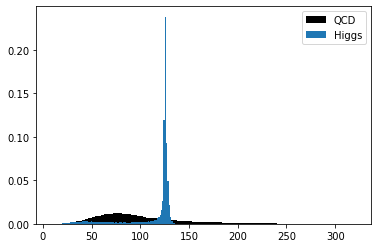

In [43]:
qcdmass = qcd_dict['mass'];
higgsmass = higgs_dict['mass']
plt.subplots_adjust(hspace = 1, wspace = 1)
plt.hist(qcdmass, 100,color='k', label = 'QCD',density = 'true')
plt.hist(higgsmass, 100,stacked = True, label = 'Higgs', density = 'true')
plt.legend()
plt.show()

In order to choose a good starting threshold to optimize the significance, I want the threhold to includes the most higgs mass and least QCD background mass. So I started with a lower bound of 110 and a higher bound of 140

# Problem 2

In [44]:
# This function gives the count of data after a specific mass selction, cut doesn't apply to data. 
# It returns the significance after a specific mass selection 

def cutonmass(lower, upper):
    qcdaftercut = 100000 - (len(qcdmass[lower > qcdmass])+len(qcdmass[qcdmass > upper]))
    higgsaftercut = 100000 - (len(higgsmass[lower > higgsmass])+len(higgsmass[higgsmass > upper]))
    qcdmu = 20000 * (qcdaftercut/len(qcdmass))
    higgsmu = 100 * (higgsaftercut/len(higgsmass))
    p2 = stats.poisson.cdf(qcdmu+higgsmu, qcdmu)
    sigma2 = stats.norm.ppf(p2)
    return sigma2

In [45]:
# let upper bound to be fixed, approximate the good guess value for the lower bound

sig_test = cutonmass(110, 140)
for i in range(20):
    sig = cutonmass(111 + i, 140)
    print([sig,i+111])

[1.5389982101950594, 111]
[1.569737427111514, 112]
[1.6018335808415753, 113]
[1.6316961013162867, 114]
[1.6660563087131792, 115]
[1.7077434767059019, 116]
[1.7488096549702217, 117]
[1.779477708851014, 118]
[1.8252774421843276, 119]
[1.8625001843558886, 120]
[1.884252428392526, 121]
[1.9215498061534964, 122]
[1.9323875707620133, 123]
[1.9106017969019997, 124]
[1.6885225830354489, 125]
[0.9193686000937213, 126]
[0.5159481080196441, 127]
[0.326624641330091, 128]
[0.18619997871739657, 129]
[0.10272971599706869, 130]


By observing the significance of different cuts, a good guess of lower bound should be around 123. As a result, I used a fixed lower bound of 122, 123, 124 in the following code to find the upper bound that gives the greatest significance

In [46]:
# a fixed lower bound value of 122. 

sig_test2 = cutonmass(122, 140)
for i in range(15):
    sig2 = cutonmass(122, 139 - i)
    print([sig2,140-i])

[1.9589585769916311, 140]
[1.9993327740517923, 139]
[2.051387060214739, 138]
[2.1233258468571714, 137]
[2.181714292665469, 136]
[2.275346989390833, 135]
[2.3491780097499615, 134]
[2.450007416999996, 133]
[2.532190889684072, 132]
[2.6374878758028846, 131]
[2.692156220574669, 130]
[2.6935775970561924, 129]
[2.5939758790792546, 128]
[2.1783055583608584, 127]
[0.9574762989973323, 126]


In [47]:
# a fixed lower bound value of 123

sig_test2 = cutonmass(123, 140)
for i in range(15):
    sig2 = cutonmass(123, 139 - i)
    print([sig2,140-i])

[2.0000033912959547, 140]
[2.0448212450963212, 139]
[2.102512689293164, 138]
[2.1529960997958453, 137]
[2.24862385981257, 136]
[2.322351746907904, 135]
[2.4071086051516817, 134]
[2.522432084999965, 133]
[2.6218824793670445, 132]
[2.7516642535732556, 131]
[2.832166976445661, 130]
[2.8645980478035016, 129]
[2.8005927074336725, 128]
[2.396255051671928, 127]
[1.0249290829677475, 126]


In [48]:
# a fixed lower bound value of 124

sig_test3 = cutonmass(124, 140)
for i in range(15):
    sig3 = cutonmass(124, 139 - i)
    print([sig3,140-i])

[1.9544954671830965, 140]
[2.030455869913388, 139]
[2.0927281312131085, 138]
[2.148388510132398, 137]
[2.2525175674286517, 136]
[2.3351398285003038, 135]
[2.4313998856088115, 134]
[2.5626779656513894, 133]
[2.6819756747659405, 132]
[2.8415597436728115, 131]
[2.9560007504111825, 130]
[3.0337389952368543, 129]
[3.032183893894291, 128]
[2.680060221998367, 127]
[1.1046188934935768, 126]


The maximum significance apears with the cut of [124, 129], the significance after that cut is 3.0337

# Problem 3

In [49]:
# apply mass cut to the data of all features

masscut_qcd =  (qcd_dict['mass'] <129) & (qcd_dict['mass'] >124)
masscut_qcd_dict = qcd_dict[masscut_qcd]
masscut_higgs = (higgs_dict['mass'] <129) & (higgs_dict['mass'] >124)
masscut_higgs_dict = higgs_dict[masscut_higgs]



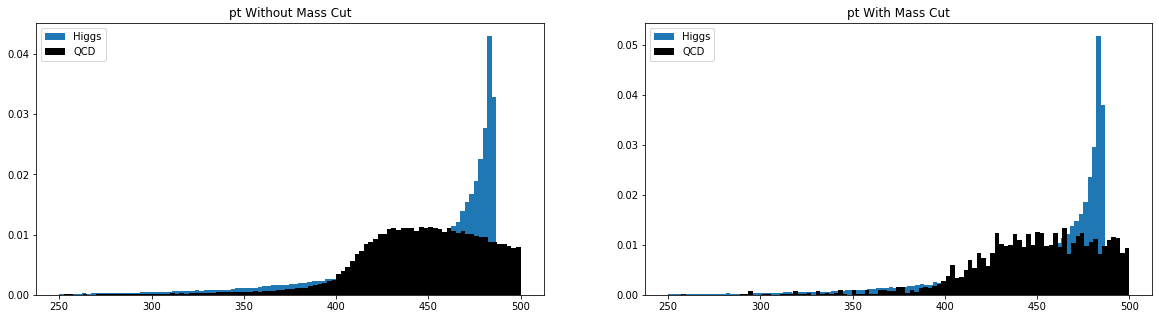

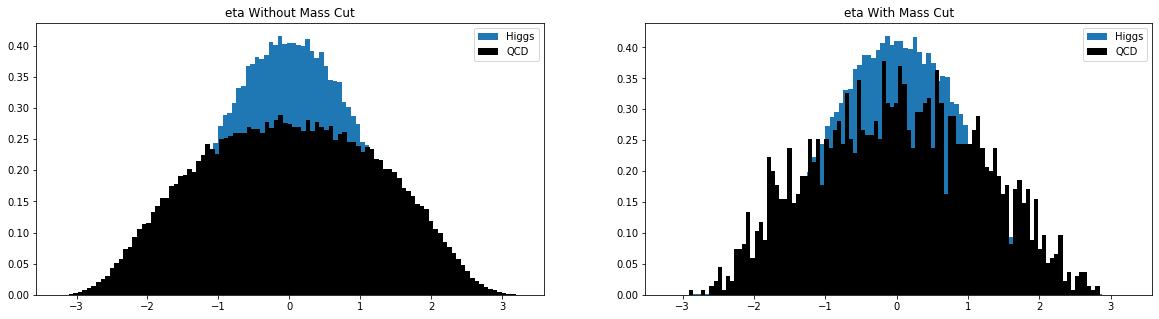

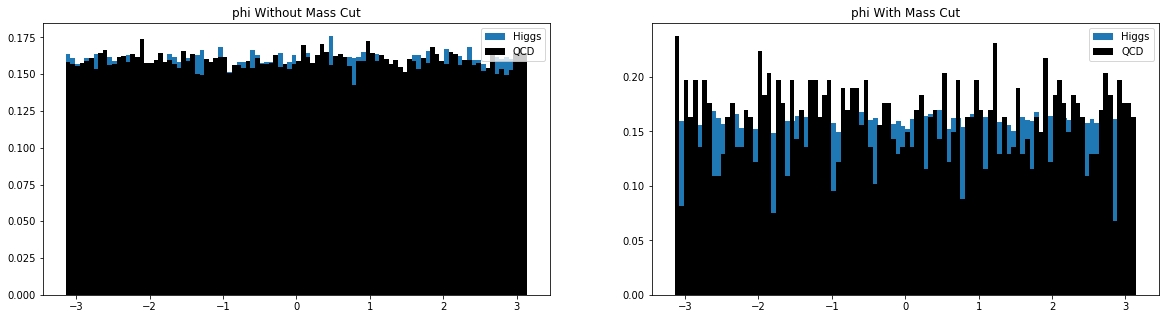

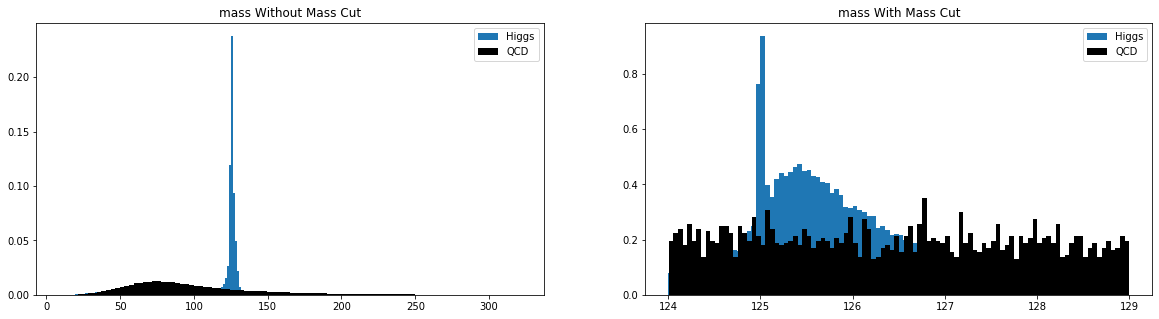

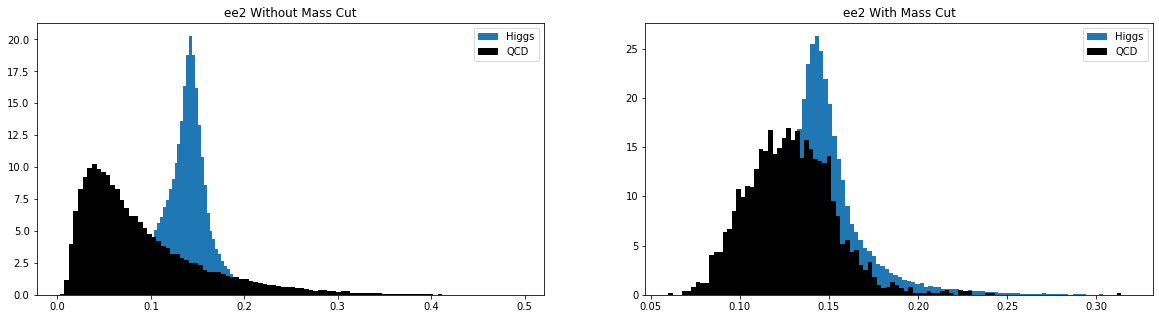

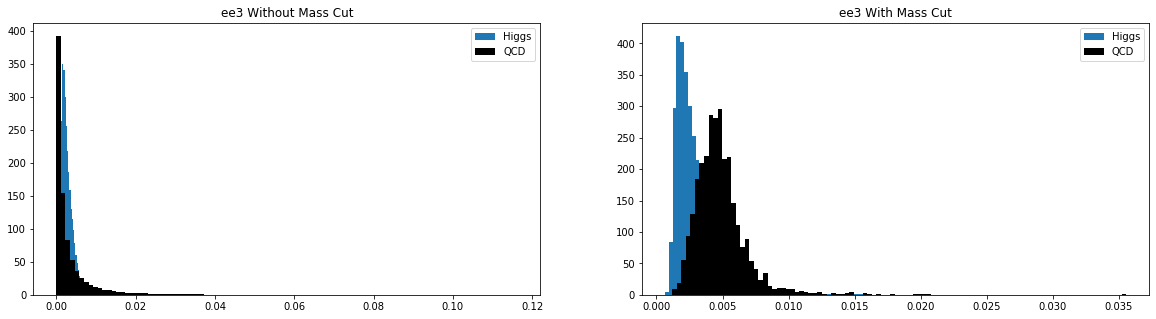

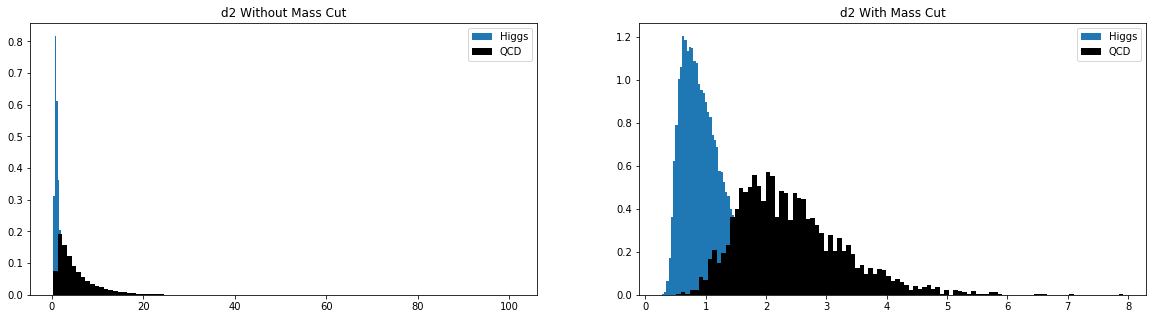

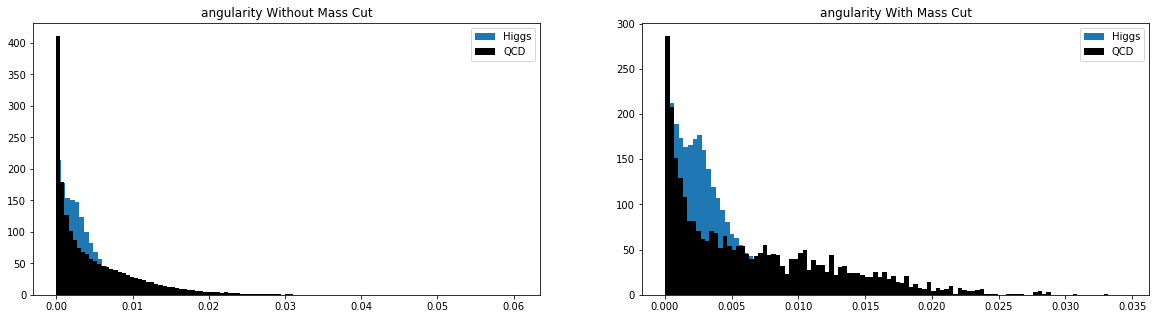

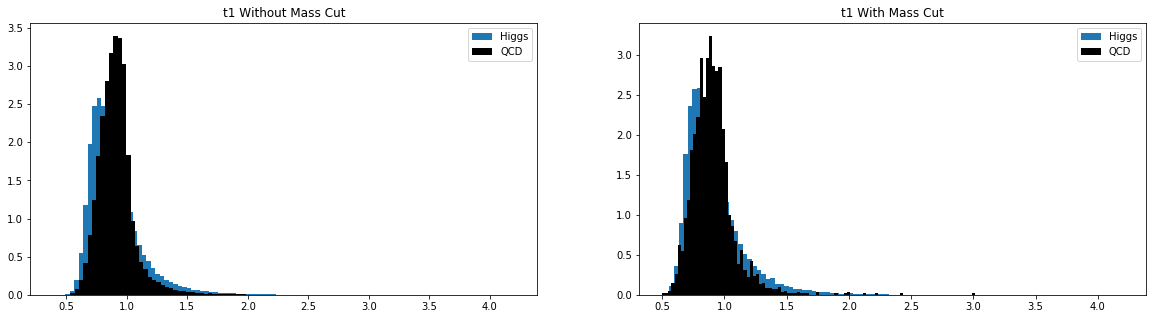

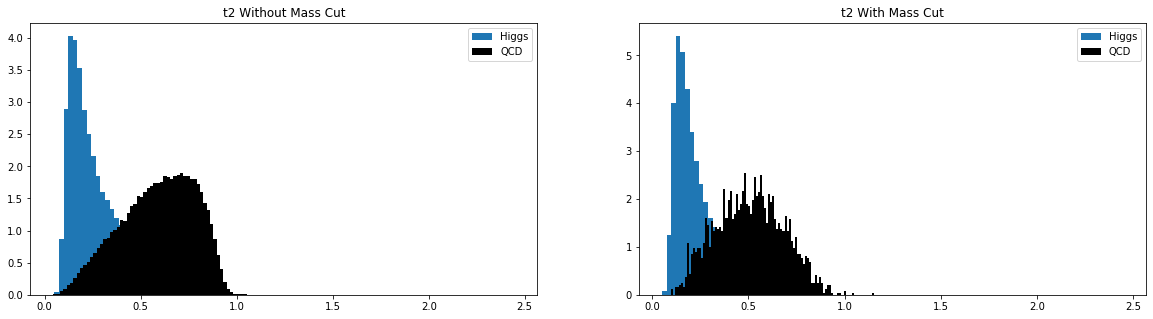

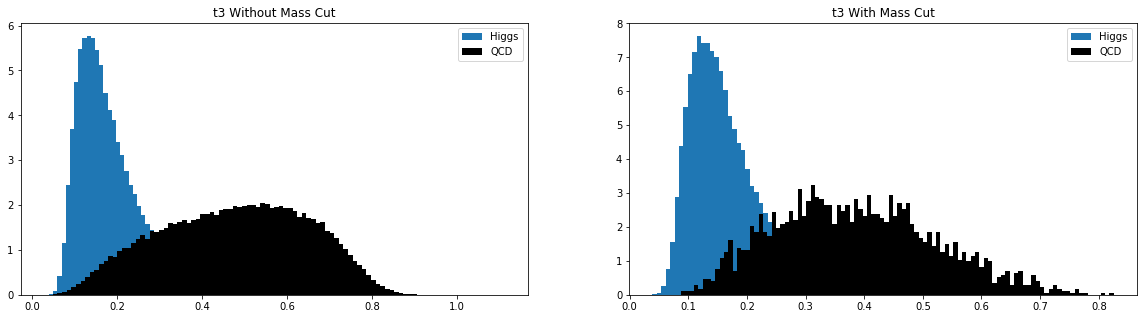

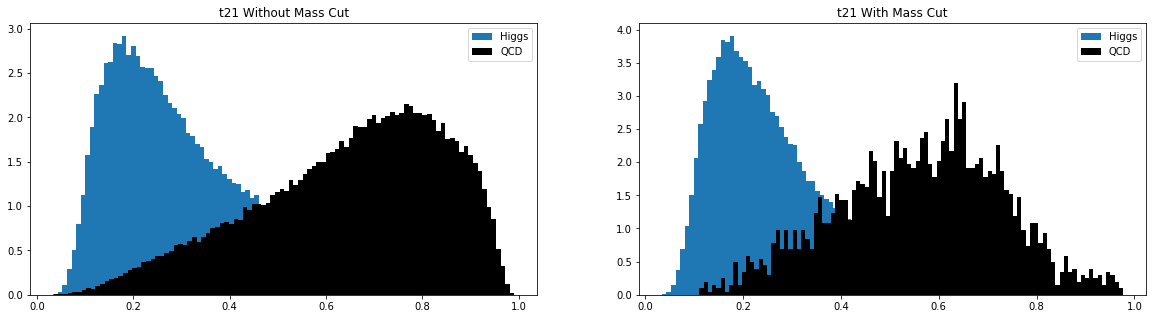

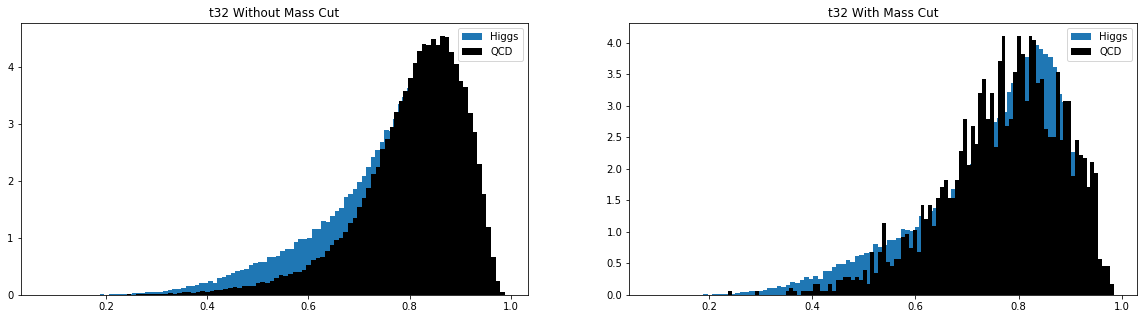

In [50]:
plotnames = ['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR']
for i in range(13):
    name = plotnames[i]
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.title(name +' Without Mass Cut')
    plt.hist(higgs_dict[name],100, label = 'Higgs',density = 'true')
    plt.hist(qcd_dict[name],100,color='k', label = 'QCD',density = 'ture')
    plt.legend()
    plt.subplot(1,2,2)
    plt.title(name +' With Mass Cut')
    plt.hist(masscut_higgs_dict[name],100, label = "Higgs", density = 'true')
    plt.hist(masscut_qcd_dict[name],100,color='k', label = 'QCD', density = 'true')
    plt.legend()
    plt.show()

By comparing the plots for different features without masscut. t2, and t3, t21, which are "N - subjetiness" jet shape variables has a potential to be good features to discriminate higgs from qcd background, because their main part of the histogram are offset (comparing qcd and higgs) by a great amount. 2-Point ECF (ee2) is also a good feature. But based on my observation, mass is still the best one.

By comparing the plots for different features after masscut. d2,t2,t3, t21 has the great potential to be the features that can further improve the significance after masscut, because their main parts of the histograms after the masscut still have offset(comparing qcd and higgs).

# Problem4

As was discussed in the privous problem, mass is the best feature for the first cut. So I kept the data after masscut and apply a second cut on t2, t3, d2 and t21 individually, which I think have the greatest potential for further improving of significance.

By observing the plots of these four features after mass cut, we can tell that "0" is already a good lower bound, since there is almost no qcd data around 0. So I only need to find a good value of upper bound to improve my significance. 

In [51]:
qcd_t2 = masscut_qcd_dict['t2']
higgs_t2 = masscut_higgs_dict['t2']
qcd_t3 = masscut_qcd_dict['t3']
higgs_t3 = masscut_higgs_dict['t3']
qcd_t21 = masscut_qcd_dict['t21']
higgs_t21 = masscut_higgs_dict['t21']
qcd_d2 = masscut_qcd_dict['d2']
higgs_d2 = masscut_higgs_dict['d2']

In [52]:
# This function is similar to cotonmass but with t2. It returns the significance after a specific t2 selection.

def cutont2(upper):
    qcd_t2cut = len(qcd_t2[qcd_t2 < upper])
    higgs_t2cut = len(higgs_t2[higgs_t2 < upper])
    qcdmu = 20000 * (qcd_t2cut/len(qcdmass))
    higgsmu = 100 * (higgs_t2cut/len(higgsmass))
    p = stats.poisson.cdf(qcdmu+higgsmu, qcdmu)
    sigma = stats.norm.ppf(p)
    return sigma

In [53]:
# This function is similar to cotonmass but with t3. It returns the significance after a specific t3 selection.

def cutont3(upper):
    qcd_t3cut = len(qcd_t3[qcd_t3 < upper])
    higgs_t3cut = len(higgs_t3[higgs_t3 < upper])
    qcdmu = 20000 * (qcd_t3cut/len(qcdmass))
    higgsmu = 100 * (higgs_t3cut/len(higgsmass))
    p = stats.poisson.cdf(qcdmu+higgsmu, qcdmu)
    sigma = stats.norm.ppf(p)
    return sigma

In [54]:
# This function is similar to cotonmass but with t21. It returns the significance after a specific t21 selection.

def cutont21(upper):
    qcd_t21cut = len(qcd_t21[qcd_t21 < upper])
    higgs_t21cut = len(higgs_t21[higgs_t21 < upper])
    qcdmu = 20000 * (qcd_t21cut/len(qcdmass))
    higgsmu = 100 * (higgs_t21cut/len(higgsmass))
    p = stats.poisson.cdf(qcdmu+higgsmu, qcdmu)
    sigma = stats.norm.ppf(p)
    return sigma

In [55]:
# This function is similar to cotonmass but with d2. It returns the significance after a specific d2 selection.

def cutond2(upper):
    qcd_d2cut = len(qcd_d2[qcd_d2 < upper])
    higgs_d2cut = len(higgs_d2[higgs_d2 < upper])
    qcdmu = 20000 * (qcd_d2cut/len(qcdmass))
    higgsmu = 100 * (higgs_d2cut/len(higgsmass))
    p = stats.poisson.cdf(qcdmu+higgsmu, qcdmu)
    sigma = stats.norm.ppf(p)
    return sigma

In [56]:
# second cut on t2, here I chose 0.5 to be my initial guess
for i in range(15):
    print([cutont2(0.5 - i/30),0.5-i/30])

[3.9263435650450593, 0.5]
[4.094257136265045, 0.4666666666666667]
[4.359192259360226, 0.43333333333333335]
[4.585348203186941, 0.4]
[4.952741415711473, 0.3666666666666667]
[5.193579182569888, 0.33333333333333337]
[5.508247753694129, 0.3]
[5.965964726556386, 0.26666666666666666]
[6.33992963558078, 0.23333333333333334]
[6.903815758384916, 0.2]
[7.27745662028784, 0.16666666666666669]
[5.895616393772531, 0.13333333333333336]
[3.0488799516177068, 0.09999999999999998]
[inf, 0.06666666666666665]
[inf, 0.033333333333333326]


By apply a second cut on t2, I obtained a better significance which is 7.28 with the cut range of [0, 0.167] on t2

In [57]:
# second cut on t3, here I chose 0.5 to be my initial guess
for i in range(10):
    print([cutont3(0.5 - i/20),0.5-i/20])

[3.26881517998405, 0.5]
[3.5258205396890436, 0.45]
[3.8143128095615646, 0.4]
[4.300702014807655, 0.35]
[4.897332217520368, 0.3]
[5.709801015541049, 0.25]
[6.784153882141768, 0.2]
[7.7115025445745395, 0.15000000000000002]
[5.088426382512204, 0.09999999999999998]
[inf, 0.04999999999999999]


Noted that "inf" means almost all qcd background are cut off with that seleciton which is pointless. So I chose the upper bound of 0.15 

By apply a second cut on t3, I obtained a better significance which is 7.71 with the cut range of [0, 0.15] on t3

In [58]:
# second cut on t21, here I chose 0.7 to be my initial guess
for i in range(15):
    print([cutont21(0.7 - i/20),0.7-i/20])

[3.31771101174035, 0.7]
[3.520645558157842, 0.6499999999999999]
[3.8150492023256133, 0.6]
[4.129272939997975, 0.5499999999999999]
[4.474984401568984, 0.49999999999999994]
[4.913950723744156, 0.44999999999999996]
[5.371741821230716, 0.39999999999999997]
[5.8753203790290165, 0.35]
[6.216743717640257, 0.29999999999999993]
[6.6652820325652025, 0.24999999999999994]
[6.708214503104032, 0.19999999999999996]
[5.560788797522544, 0.1499999999999999]
[inf, 0.09999999999999998]
[inf, 0.04999999999999993]
[inf, 0.0]


Noted that "inf" means almost all qcd background are cut off with that seleciton which is pointless. So I chose the upper bound of 0.2 

By apply a second cut on t21, I obtained a better significance which is 6.7 with the cut range of [0, 0.200] on t21

In [75]:
# second cut on d2, here I chose 2 to be my initial guess
for i in range(10):
    print([cutond2(2 - i/10),2-i/10])

[4.594169833747455, 2.0]
[4.829182386558339, 1.9]
[5.138023017978852, 1.8]
[5.569684765160445, 1.7]
[5.991568931041873, 1.6]
[6.603290048781358, 1.5]
[7.298758839357407, 1.4]
[7.813749990423569, 1.3]
[8.125890664701908, 1.2]
[inf, 1.1]


Noted that "inf" means almost all qcd background are cut off with that seleciton which is pointless. So I chose the upper bound of 1.2 

By apply a second cut on d2, I obtained a better sigificance which is 8.13 with the cut range of [0, 1.2] on d2

# Discussion

After applying the second cut based on different features, the greatest significance I got is 8.13 with the second cut on d2. The range for mass is [124, 129] and [0, 1.2] for d2.

I got the greatest significance of 3.03 after mass cut and 8.13 after the second cut on d2. My lab partner got the greatest significance of 4 sigma with mass cut and 5.005 with a second cut on d2. We agree that mass is the best feature for the first cut and d2 is the best fiture for the second cut. 

# Optional Problem

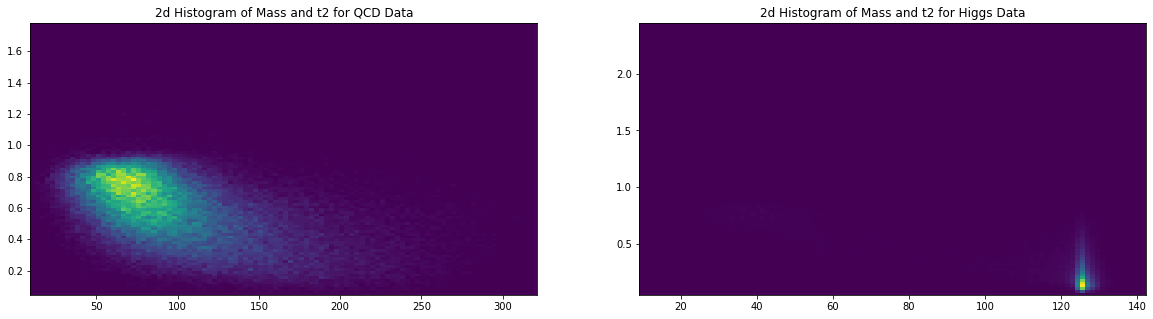

In [60]:
# From the plots in the previous question, two top features for the first cut that I chose are mass and t2
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.hist2d(qcdmass, qcd_dict['t2'], bins =[100,100])
plt.title('2d Histogram of Mass and t2 for QCD Data')
plt.subplot(1,2,2)
plt.title('2d Histogram of Mass and t2 for Higgs Data')
plt.hist2d(higgsmass, higgs_dict['t2'], bins=[100,100])
plt.show()

# Lab 8

# Problem 1

In [61]:
highLumi_dict = pandas.read_hdf("data_highLumi_pt_250_500.h5")
lowLumi_dict = pandas.read_hdf("data_lowLumi_pt_250_500.h5")
highLumi_dict.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [62]:
mass_highLumi = highLumi_dict['mass']
d2_highLumi = highLumi_dict['d2']
mass_lowLumi = lowLumi_dict['mass']
d2_lowLumi = lowLumi_dict['d2']

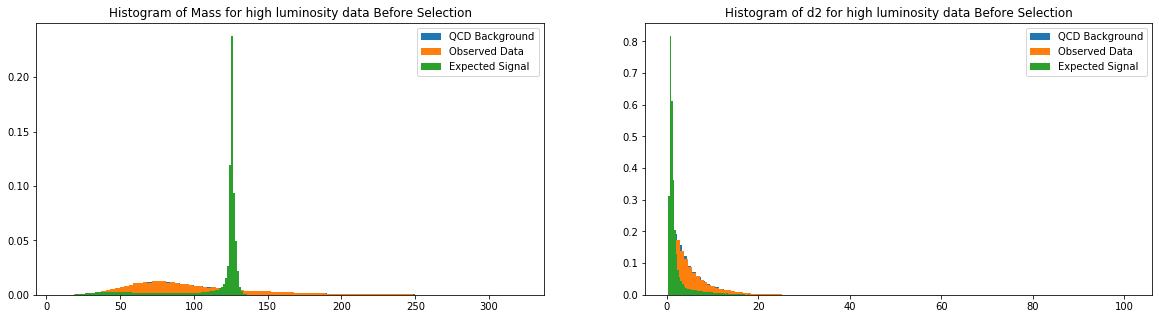

In [63]:
# Making plots of data before features selection

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('Histogram of Mass for high luminosity data Before Selection')
plt.hist(qcdmass,100,label = 'QCD Background',density = 'true')
plt.hist(mass_highLumi, 100, label = 'Observed Data',density = 'true')
plt.hist(higgs_dict['mass'], 100, density = 'true', label = 'Expected Signal')
plt.legend()
plt.subplot(1,2,2)
plt.title('Histogram of d2 for high luminosity data Before Selection')
plt.hist(qcd_dict['d2'],100,label = 'QCD Background', density = 'true')
plt.hist(d2_highLumi,100, label = 'Observed Data',density = 'true')
plt.hist(higgs_dict['d2'], 100, density = 'true', label = 'Expected Signal')
plt.legend()
plt.show()

As we can tell from the plots, the background and the observed data are pretty much overlap, which means that the simulation is really good

In [64]:
# Aplly my features cut from lab 7. [124, 129] for mass, [0,1.2] for d2

masscut_highLumi_boolean = (highLumi_dict['mass'] > 124) & (highLumi_dict['mass']<129)
masscut_highLumi_sel = highLumi_dict[masscut_highLumi_boolean]

mass_highLumi_sel = masscut_highLumi_sel['mass']
d2_withmasscut = masscut_highLumi_sel['d2']
d2_highLumi_sel= d2_withmasscut[d2_withmasscut < 1.2]

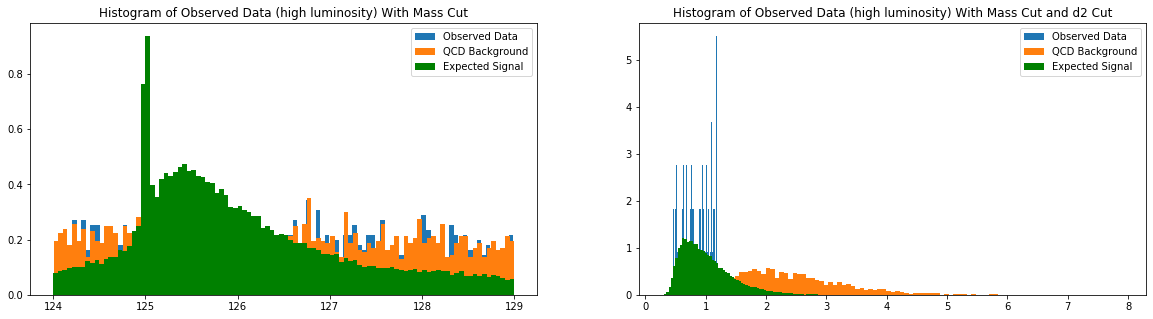

In [65]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('Histogram of Observed Data (high luminosity) With Mass Cut')
plt.hist(mass_highLumi_sel,100,density = 'ture',label = 'Observed Data')
plt.hist(masscut_qcd_dict['mass'], 100,density = 'ture', label = 'QCD Background')
plt.hist(masscut_higgs_dict['mass'], 100,density = 'ture',color = 'g', label = 'Expected Signal')
plt.legend()
plt.subplot(1,2,2)
plt.title('Histogram of Observed Data (high luminosity) With Mass Cut and d2 Cut')
plt.hist(d2_highLumi_sel,100, density = 'true',label = 'Observed Data')
plt.hist(qcd_d2,100,density = 'true',label = 'QCD Background')
plt.hist(higgs_d2,100,density = 'true',color = 'g',label = 'Expected Signal')
plt.legend()
plt.show()

In [66]:
# Here qcd_d2 is the d2 vallues after masscut by using 100000 sinmulated qcd data, which is from lab7. 
# r is the ratio to convert the weight of 100000 data length to the observed data length
# signal_highlu_observed is the number of observed data for high luminosity after both mass cut and d2 cut
r = len(highLumi_dict['mass'])/100000
qcd_mu = 20000*r*(len(qcd_d2[qcd_d2 < 1.2])/100000)
signal_highlu_observed = len(d2_highLumi_sel)
print('the numbers of qcd background that falls into the selection range is ',qcd_mu)
print('the numbers of observed jets features that falls into the selection range is ',signal_highlu_observed)

p_higgs = stats.poisson.cdf(signal_highlu_observed + qcd_mu, qcd_mu)
sigma_higgs = stats.norm.ppf(p_higgs)
print('The significance for high luminosity data is ',sigma_higgs)

the numbers of qcd background that falls into the selection range is  8.633616
the numbers of observed jets features that falls into the selection range is  130
The significance for high luminosity data is  inf


Noted that the "inf" means a really big value of significance, so we can have a great confidence to claim a discovery

# Problem 2

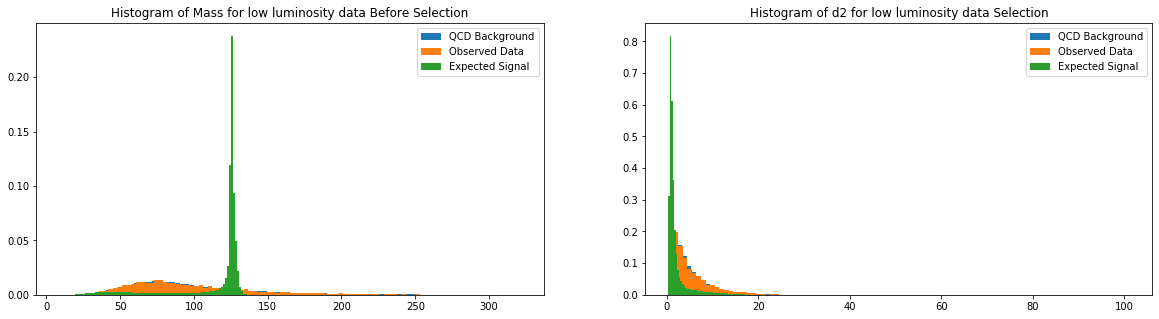

In [67]:
# Making plots of data before features selection for low luminosity data

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('Histogram of Mass for low luminosity data Before Selection')
plt.hist(qcdmass,100,label = 'QCD Background',density = 'true')
plt.hist(mass_lowLumi, 100, label = 'Observed Data',density = 'true')
plt.hist(higgs_dict['mass'], 100, density = 'true', label = 'Expected Signal')
plt.legend()
plt.subplot(1,2,2)
plt.title('Histogram of d2 for low luminosity data Selection')
plt.hist(qcd_dict['d2'],100,label = 'QCD Background', density = 'true')
plt.hist(d2_lowLumi,100, label = 'Observed Data',density = 'true')
plt.hist(higgs_dict['d2'], 100, density = 'true', label = 'Expected Signal')
plt.legend()
plt.show()

In [68]:
# Aplly my features cut from lab 7. [124, 129] for mass, [0,1.2] for d2

masscut_lowLumi_boolean = (lowLumi_dict['mass'] > 124) & (lowLumi_dict['mass']<129)
masscut_lowLumi_sel = lowLumi_dict[masscut_lowLumi_boolean]

mass_lowLumi_sel = masscut_lowLumi_sel['mass']
d2_withmasscut2 = masscut_lowLumi_sel['d2']
d2_lowLumi_sel= d2_withmasscut2[d2_withmasscut2 < 1.2]

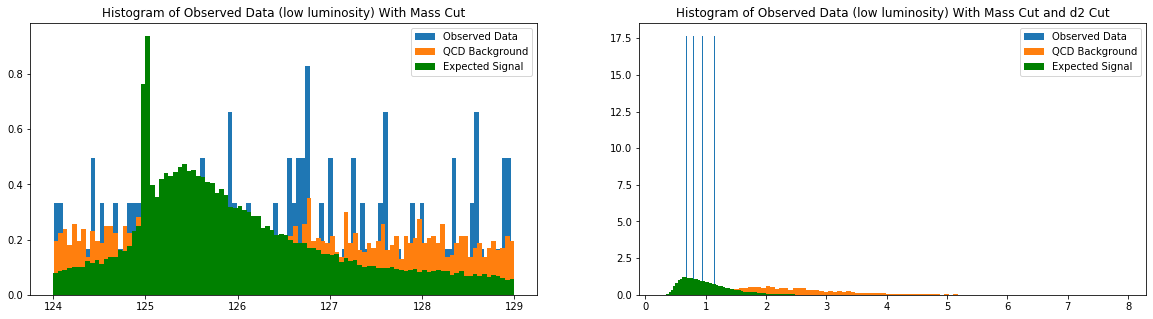

In [69]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('Histogram of Observed Data (low luminosity) With Mass Cut')
plt.hist(mass_lowLumi_sel,100,density = 'ture',label = 'Observed Data')
plt.hist(masscut_qcd_dict['mass'], 100,density = 'ture', label = 'QCD Background')
plt.hist(masscut_higgs_dict['mass'], 100,density = 'ture',color = 'g', label = 'Expected Signal')
plt.legend()
plt.subplot(1,2,2)
plt.title('Histogram of Observed Data (low luminosity) With Mass Cut and d2 Cut')
plt.hist(d2_lowLumi_sel,100, density = 'true',label = 'Observed Data')
plt.hist(qcd_d2,100,density = 'true',label = 'QCD Background')
plt.hist(higgs_d2,100,density = 'true',color = 'g',label = 'Expected Signal')
plt.legend()
plt.show()

In [70]:
# Here qcd_d2 is the d2 vallues after masscut by using 100000 sinmulated qcd data, which is from lab7. 
# r is the ratio to convert the weight of 100000 data length to the observed data length
# signal_lowlu_observed is the number of observed jets for low luminosity after both mass cut and d2 cut

qcd_mu = 20000*r*(len(qcd_d2[qcd_d2<1.2])/100000)
signal_lowlu_observed = len(d2_lowLumi_sel)
print('the average number of qcd background that falls into the selection range is ',qcd_mu)
print('the numbers of observed jets features that falls into the selection range is ',signal_lowlu_observed)

p_higgs = stats.poisson.cdf(signal_lowlu_observed + qcd_mu, qcd_mu)
sigma_higgs = stats.norm.ppf(p_higgs)
print('The significance for low luminosity data is ',sigma_higgs)

the average number of qcd background that falls into the selection range is  8.633616
the numbers of observed jets features that falls into the selection range is  10
The significance for low luminosity data is  2.9590466657951264


# Problem 3

In [71]:
# here higgs_d2 is the d2 values for higgs data after mass cut
# r is the ratio to convert the weight of 100000 data length to the observed data length
# signal_expected is the average number of higgs jet (simulated) that falls in to the selection range

signal_expected = 100*r*(len(higgs_d2[higgs_d2<1.2])/100000)
p_upperbound_exp = stats.poisson.ppf(0.95, signal_expected)
p_upperbound_obs = stats.poisson.ppf(0.95, signal_lowlu_observed)
print('the expected signal strength is ', signal_expected)
print('the upper bound of 95% confidence interval for observed signal is ',p_upperbound_obs)
print('the upper bound of 95% confidence interval for expected signal is ', p_upperbound_exp)

the expected signal strength is  19.16501376
the upper bound of 95% confidence interval for observed signal is  15.0
the upper bound of 95% confidence interval for expected signal is  27.0


As is shown above, the upper bound of observed signal is significantly smaller than the upper bound of expected signal. One possible reason is that the simulation doesn't fit very well for low luminosity data.

# Optional Problem

In [72]:
p_low = stats.norm.cdf(-1)
p_up = stats.norm.cdf(1)
lowerthreshold = stats.poisson.ppf(p_low, p_upperbound_exp)
upperthreshold = stats.poisson.ppf(p_up, p_upperbound_exp) 
print(lowerthreshold, upperthreshold)

22.0 32.0


So the 1 sigma uncertainty range is 27 +- 5

# End

Cheers!!

Thank for teaching this quarter Alex, really appreciate for your patient